# UFO Sightings Data Analysis

This notebook analyses UFO sightings data using various Python data libraries

In [64]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd

load_dotenv()

POSTGRES_USER = os.getenv('POSTGRES_USER')
POSTGRES_PASSWORD = os.getenv('POSTGRES_PASSWORD')
POSTGRES_HOST = os.getenv('POSTGRES_HOST')
POSTGRES_PORT = os.getenv('POSTGRES_PORT')
POSTGRES_DB = os.getenv('POSTGRES_DB')

connection_string = f"postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}"


engine = create_engine(connection_string)

df = pd.read_sql("SELECT * FROM ufo_sightings LIMIT 10", engine)
df.head()


,id,datetime,city,state,country,shape,duration_seconds,duration_hours_min,comments,date_posted,latitude,longitude
0,3,2008-07-04 22:45:00,Mercer Island,WA,US,unknown,5.0,5 seconds,Power surge that effected the whole block and ...,None,47.570835,-122.220833
1,2,2006-10-10 05:00:00,San Francisco,CA,US,triangle,600.0,10 minutes,black triangles were seen flying across the su...,None,37.775002,-122.418335
2,1,2014-01-11 16:00:00,Roseville,MN,US,fireball,10.0,10 seconds,Green fireball fast moving. Shooting down tow...,None,45.006111,-93.156387
3,4,2008-08-10 20:30:00,Brandon (canada),MB,CA,light,10.0,10 seconds,((HOAX?? Date and time are flawed.)) Green l...,None,49.833332,-99.949997
4,5,2010-07-04 10:00:00,Knoxville,TN,US,fireball,45.0,45 seconds,Big reddish-orange (planet-looking) light hove...,None,35.960556,-83.920830


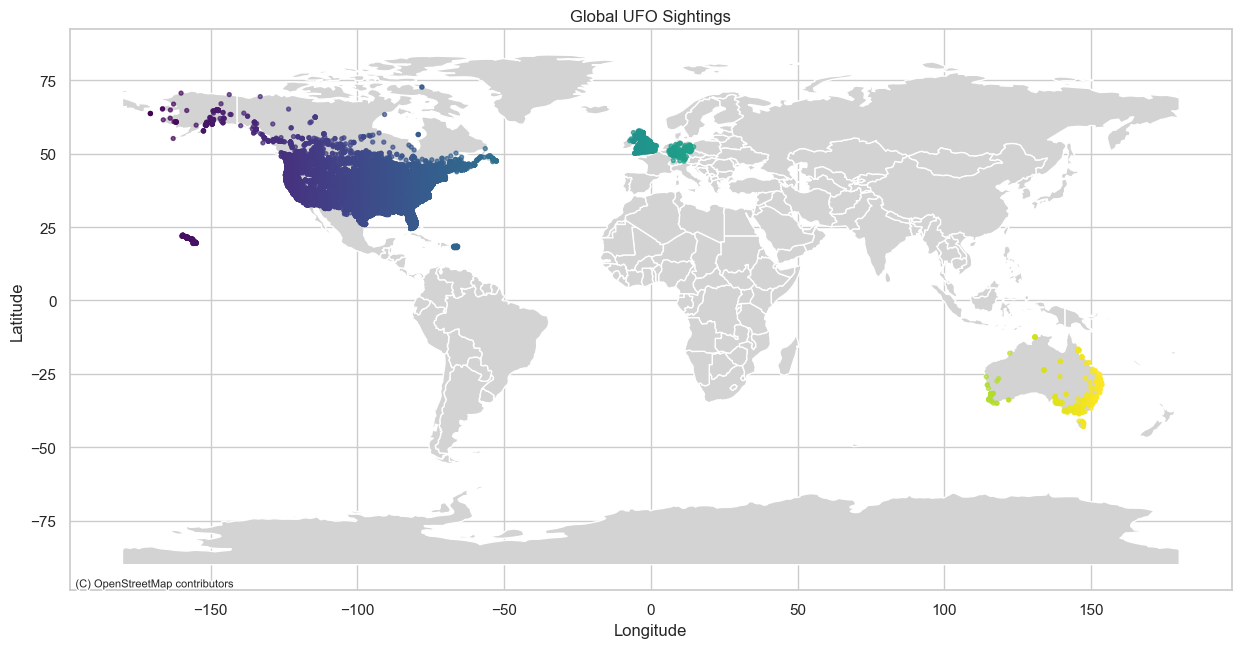

In [65]:
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd

world = gpd.read_file('../ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

gdf = gdf.set_crs(epsg=4326)

gdf['color_value'] = gdf['longitude']

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')

gdf.plot(ax=ax, column='color_value', cmap='viridis', markersize=8, alpha=0.7, legend=False)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

plt.title("Global UFO Sightings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



/var/folders/qs/79gj4wkx2kj66dbwh4frc59r0000gr/T/ipykernel_55375/4110625775.py:11: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


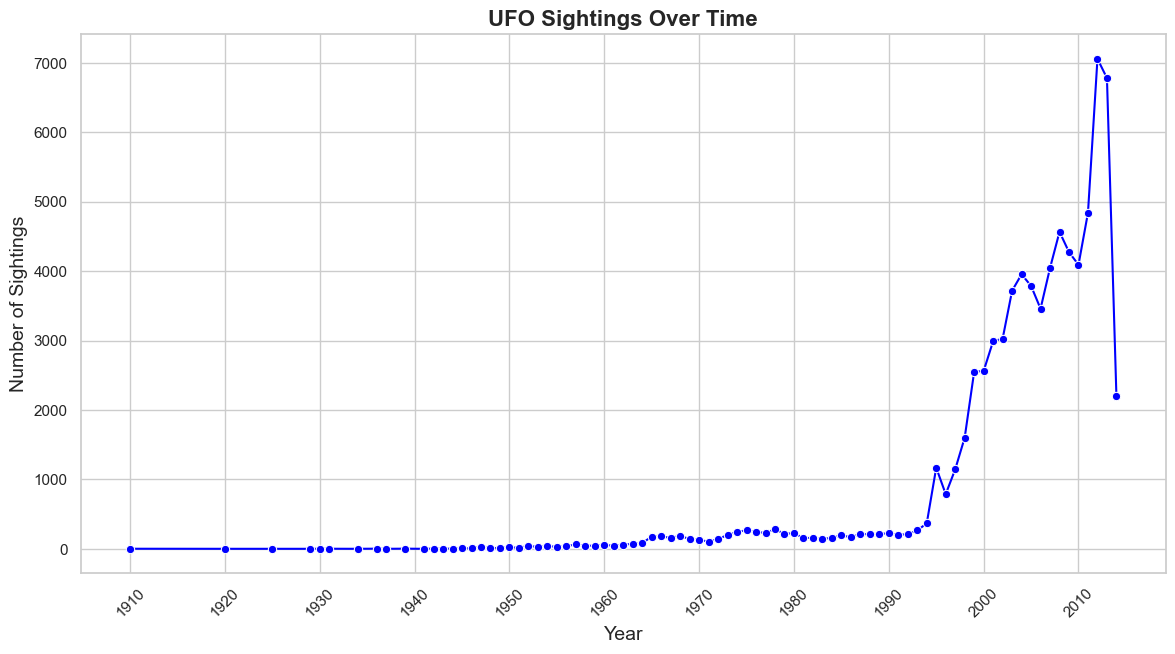

In [23]:
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float, DateTime, Date, func, extract
from sqlalchemy.orm import sessionmaker
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Base = declarative_base()

class UfoSighting(Base):
    __tablename__ = 'ufo_sightings'
    
    id = Column(Integer, primary_key=True)
    datetime = Column(DateTime)
    city = Column(String(100))
    state = Column(String(50))
    country = Column(String(50))
    shape = Column(String(50))
    duration_seconds = Column(Float)
    duration_hours_min = Column(String(50))
    comments = Column(String)
    date_posted = Column(Date)
    latitude = Column(Float)
    longitude = Column(Float)

Session = sessionmaker(bind=engine)
session = Session()

results = session.query(
    extract('year', UfoSighting.datetime).label('year'),
    func.count(UfoSighting.id).label('sightings_count')
).group_by('year').order_by('year').all()

df = pd.DataFrame(results, columns=['year', 'sightings_count'])

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='sightings_count', data=df, marker='o', color='blue')

plt.title('UFO Sightings Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Sightings', fontsize=14)

plt.xticks(np.arange(int(df['year'].min()), int(df['year'].max()) + 1, 10), rotation=45)

plt.show()



/var/folders/qs/79gj4wkx2kj66dbwh4frc59r0000gr/T/ipykernel_55375/2567539534.py:10: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()
/var/folders/qs/79gj4wkx2kj66dbwh4frc59r0000gr/T/ipykernel_55375/2567539534.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['state_country'] = df_top['state'] + ' (' + df_top['country'] + ')'


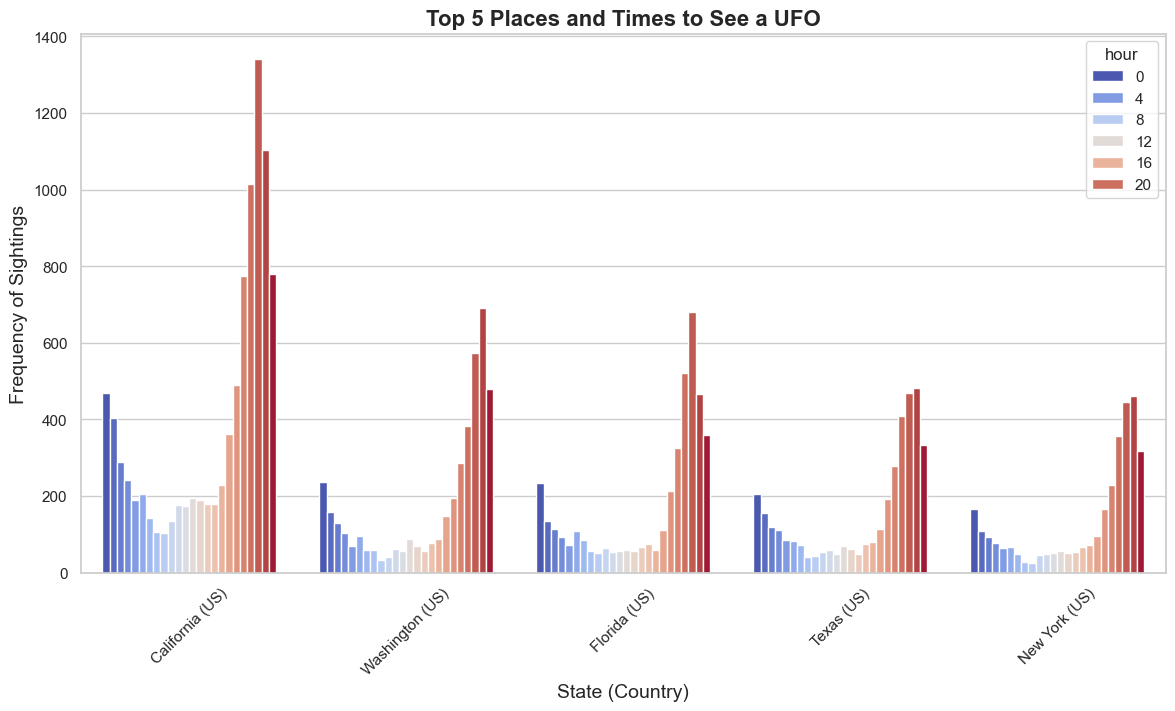

In [28]:
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float, DateTime, Date, func, extract
from sqlalchemy.orm import sessionmaker
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Base = declarative_base()

class UfoSighting(Base):
    __tablename__ = 'ufo_sightings'
    
    id = Column(Integer, primary_key=True)
    datetime = Column(DateTime)
    city = Column(String(100))
    state = Column(String(50))
    country = Column(String(50))
    shape = Column(String(50))
    duration_seconds = Column(Float)
    duration_hours_min = Column(String(50))
    comments = Column(String)
    date_posted = Column(Date)
    latitude = Column(Float)
    longitude = Column(Float)

state_full_names = {
    'CA': 'California',
    'TX': 'Texas',
    'FL': 'Florida',
    'NY': 'New York',
    'WA': 'Washington',
}

Session = sessionmaker(bind=engine)
session = Session()

results = session.query(
    UfoSighting.state,
    UfoSighting.country,
    extract('hour', UfoSighting.datetime).label('hour'),
    func.count(UfoSighting.id).label('sightings_count')
).group_by(UfoSighting.state, UfoSighting.country, 'hour').all()


df = pd.DataFrame(results, columns=['state', 'country', 'hour', 'sightings_count'])

df_grouped = df.groupby(['state', 'country', 'hour'])['sightings_count'].sum().reset_index()

df_grouped['state'] = df_grouped['state'].map(state_full_names)

df_grouped_sorted = df_grouped.sort_values(by='sightings_count', ascending=False)

top_states = df_grouped_sorted.groupby(['state', 'country'])['sightings_count'].sum().nlargest(5).reset_index()

df_top = df_grouped_sorted[df_grouped_sorted[['state', 'country']].apply(tuple, 1).isin(top_states[['state', 'country']].apply(tuple, 1))]

df_top['state_country'] = df_top['state'] + ' (' + df_top['country'] + ')'

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.barplot(
    x='state_country', 
    y='sightings_count', 
    hue='hour', 
    data=df_top, 
    palette='coolwarm'
)

plt.title('Top 5 Places and Times to See a UFO', fontsize=16, fontweight='bold')
plt.xlabel('State (Country)', fontsize=14)
plt.ylabel('Frequency of Sightings', fontsize=14)

plt.xticks(rotation=45)

plt.show()




/var/folders/qs/79gj4wkx2kj66dbwh4frc59r0000gr/T/ipykernel_55375/3878621282.py:10: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()
/var/folders/qs/79gj4wkx2kj66dbwh4frc59r0000gr/T/ipykernel_55375/3878621282.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


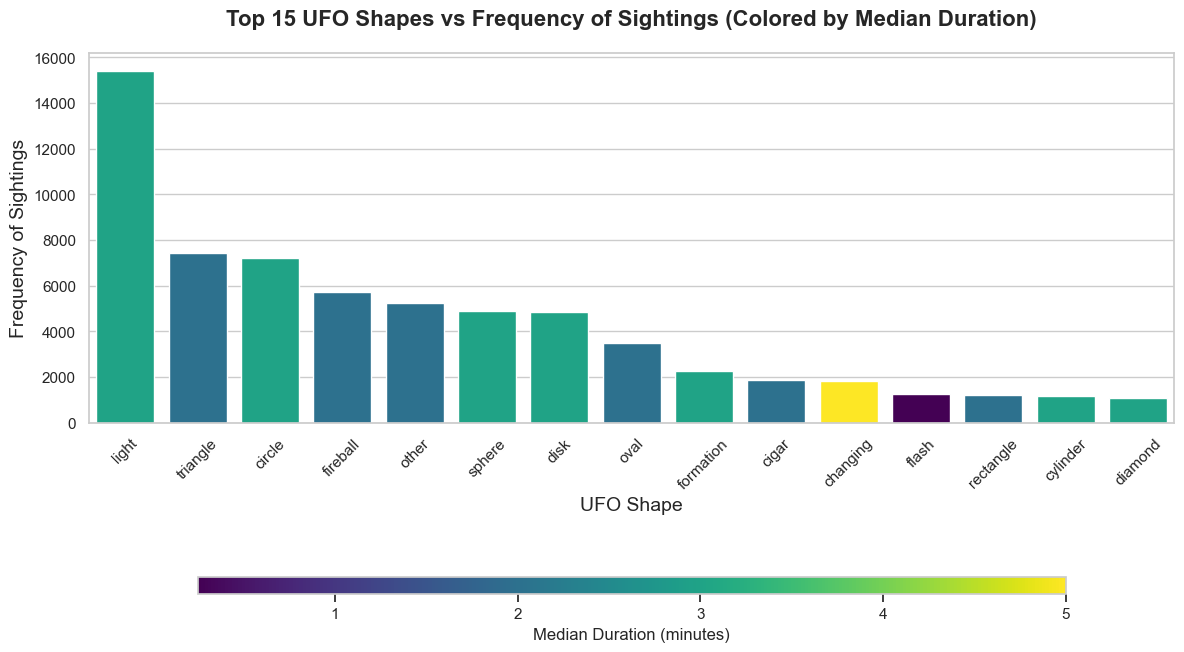

In [62]:
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float, DateTime, Date, func
from sqlalchemy.orm import sessionmaker
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Base = declarative_base()

class UfoSighting(Base):
    __tablename__ = 'ufo_sightings'
    
    id = Column(Integer, primary_key=True)
    datetime = Column(DateTime)
    city = Column(String(100))
    state = Column(String(50))
    country = Column(String(50))
    shape = Column(String(50))
    duration_seconds = Column(Float)
    duration_hours_min = Column(String(50))
    comments = Column(String)
    date_posted = Column(Date)
    latitude = Column(Float)
    longitude = Column(Float)

Session = sessionmaker(bind=engine)
session = Session()

results = session.query(
    UfoSighting.shape,
    func.count(UfoSighting.id).label('sightings_count'),
    func.percentile_cont(0.5).within_group(UfoSighting.duration_seconds).label('median_duration')
).group_by(UfoSighting.shape).all()

df = pd.DataFrame(results, columns=['shape', 'sightings_count', 'median_duration'])

df['median_duration'] = df['median_duration'] / 60

df = df.dropna(subset=['shape'])
df = df[df['shape'].str.lower() != 'unknown']

df = df.sort_values(by='sightings_count', ascending=False)

df_top15 = df.head(15)

sns.set_theme(style="whitegrid")

norm = plt.Normalize(vmin=df_top15['median_duration'].min(), vmax=df_top15['median_duration'].max())

plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    x='shape', 
    y='sightings_count', 
    data=df_top15, 
    palette='viridis'
)

colors = plt.cm.viridis(norm(df_top15['median_duration'].values))
for bar, color in zip(barplot.patches, colors):
    bar.set_facecolor(color)

plt.title('Top 15 UFO Shapes vs Frequency of Sightings (Colored by Median Duration)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('UFO Shape', fontsize=14)
plt.ylabel('Frequency of Sightings', fontsize=14)

plt.xticks(rotation=45)

sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=barplot, orientation='horizontal', pad=0.25, aspect=50, shrink=0.8)
cbar.set_label('Median Duration (minutes)')

plt.show()

